##UTILITIES

In [ ]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from collections import Counter, defaultdict

from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import StandardScaler, LabelEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay
)

from matplotlib.pyplot import boxplot,xticks

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold,RepeatedStratifiedKFold, cross_val_score, KFold, RandomizedSearchCV,GridSearchCV, RepeatedKFold

from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall
from scikitplot.metrics import plot_cumulative_gain, plot_lift_curve

In [ ]:
!pip install scikit-plot

In [ ]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import defaultdict
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.datasets import make_imbalance
from collections import defaultdict
from yellowbrick.contrib.classifier import DecisionViz
from sklearn.decomposition import PCA
from itertools import product
from yellowbrick.datasets import load_credit
from yellowbrick.features import PCA as yPCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from scikitplot.metrics import plot_precision_recall, plot_roc, plot_cumulative_gain, plot_lift_curve
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.model_selection import KFold
from sklearn import tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score

In [ ]:
df_train=pd.read_csv("ravdess_train.csv")
df_test=pd.read_csv("Ravdess_test.csv")

In [ ]:
def print_rocCurve(clf,X_test,y_test):
    y_tmp=clf.predict_proba(X_test)
    plot_roc(y_test, clf.predict_proba(X_test),figsize=(10,6))
    plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

def plot_res(y_pred, y_score, y_test):
    #ROC CURVE: implementazione legata esclusivamente all'attività di classificazione binaria
    #false positive rate, true positive rate
    print("****** ROC CURVE + AUC?: passo passo *******")


    # Genera alcuni dati di esempio per tre classi
    n_classes = 8


    # Binariaza le etichette
    y_true_bin = label_binarize(y_test, classes=np.arange(n_classes))

    # Calcola la curva ROC aggregata
    fpr, tpr, _ = roc_curve(y_true_bin.ravel(), y_score.ravel())
    roc_auc = auc(fpr, tpr)

    # Plotta la curva ROC
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2,
            label='Curva ROC (AUC = {0:0.2f})'
            ''.format(roc_auc))

    plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Linea di riferimento diagonale
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Tasso di falsi positivi')
    plt.ylabel('Tasso di veri positivi')
    plt.title('Curva ROC per la classificazione multi-classe')
    plt.legend(loc="lower right")
    plt.show()

    print("____________________________________")
    print("****** VALORE DI AUC *******")
    print("____________________________________")
    print("****** VALORE DI AUC *******")
    micro_roc_auc_ovr = roc_auc_score(
        y_test,
        y_score,
        multi_class="ovr",
        average="micro",
)

    print(f"Micro-averaged One-vs-Rest ROC AUC score:\n{micro_roc_auc_ovr:.2f}")

    print("____________________________________")
    print("****** ROC CURVE: con metodo diretto *******")
    plot_roc(y_test, y_score)
    plt.show()

    print("____________________________________")
    print("****** Precision recall: con metodo diretto *******")
    plot_precision_recall(y_test, y_score)
    plt.show()

In [ ]:
def result_pred(y_true, y_pred):
    print("**** Matrice di Confusione *****")
    # Calcola la matrice di confusione
    confusion_mat = confusion_matrix(y_true, y_pred)

    # Plotta la matrice di confusione
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues")
    plt.title("Matrice di confusione")
    plt.xlabel("Etichetta predetta")
    plt.ylabel("Etichetta vera")
    plt.show()


    # Calcolo dell'accuracy
    print("***** Calcolo dell'accuracy *****")
    accuracy = accuracy_score(y_true, y_pred)
    print('Accuracy: %0.4f' % accuracy)
    print("____________________________________________")

    # Calcolo della precision
    print("**** Calcolo della precisione *****")
    #Percentuale di classificazioni positive che sono corrette
    #se dico "positivo" dico giusto?
    precision = precision_score(y_true, y_pred, average ="macro")
    print('Percentuale di classificazioni positive che sono corrette: %0.4f' % precision)
    print("____________________________________________")

    # Calcolo della recall
    print("**** Calcolo della recall (sensitivity) *****")
    recall = recall_score(y_true, y_pred, average="macro")
    print('Percentuale di elementi positivi del testing set che sono stati classificati come positivi: %0.4f' % recall)
    print("____________________________________________")

    # Calcolo della specificity
    print("**** Calcolo della specificity *****")
   # Calcola la matrice di confusione
    confusion_mat = confusion_matrix(y_true, y_pred)

    # Calcola la specificità per ciascuna classe
    specificity_scores = []
    for i in range(n_classes):
        tn = np.sum(np.delete(np.delete(confusion_mat, i, axis=0), i, axis=1))
        fp_fn = np.sum(np.delete(confusion_mat, i, axis=0)[:, i]) + np.sum(confusion_mat[i, np.arange(n_classes) != i])
        specificity = tn / (tn + fp_fn)
        specificity_scores.append(specificity)

    # Stampa la specificità per ciascuna classe
    print("Specificità per classe:")
    for i, specificity in enumerate(specificity_scores):
        print("Classe {}: {:.2f}".format(i, specificity))
        print('Percentuale di elementi negativi del testing set che sono stati classificati come negativi: %0.4f' % specificity)
        print("-----")

    # Calcolo dell'F1 score
    print("**** Calcolo della F1 score *****")
    f1 = f1_score(y_true, y_pred, average="macro")
    #Il punteggio F1 può essere interpretato come una media ponderata della precisione e della recall,
    #in cui un punteggio F1 raggiunge il suo valore migliore a 1 e il punteggio peggiore a 0.
    print('F1 scores: %0.4f' % f1)
    print("____________________________________________")

    # Stampiamo le stesse statistiche dalla funzione report
    print(classification_report(y_test, y_pred))

    print("Con le tecniche viste finora non viene fornita nessuna informazione sulla “gravità” degli errori (“errore lieve” oppure “errore grave)")
    print("per questo si usano la curva CMC, la curva ROC")

In [ ]:
def print_confMatrix(y_test,y_test_pred):
    cm=confusion_matrix(y_test, y_test_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap="Greens")
    plt.show()

In [ ]:
df_train

,Vocal_channel_,Emotion,Emotional_intensity,Statement,Repetition,Sex,mean,q50,q75,kur,...,sc_q99_w4,sc_kur_w4,sc_skew_w4,stft_sum_w4,stft_q05_w4,stft_q75_w4,stft_q95_w4,stft_kur_w4,stft_skew_w4,actor
0,1,5,0,1,0,1,0.018034,-0.063106,-0.76930,0.553248,...,1.332275,11.020083,-4.354785,0.161158,2.167997,0.690192,0.036057,9.400360,-3.035005,1
1,1,5,0,1,1,1,0.013950,-0.063106,-0.76930,0.770118,...,1.315989,-0.107613,-0.659640,-0.173413,1.610931,0.409754,0.036057,-0.186504,0.434538,1
2,1,5,0,0,0,1,0.018855,-0.063106,-0.76930,0.851346,...,1.369021,7.023345,-3.086640,-0.286208,1.285119,0.722854,0.036057,2.891302,-1.463754,1
3,1,5,0,0,1,1,0.018087,-0.063106,-0.76930,1.562804,...,1.206493,-0.211628,-0.396009,-0.588962,1.176485,0.560400,0.036057,-0.049566,-0.052845,1
4,1,1,0,1,0,1,0.015921,-0.063106,-0.76930,0.286970,...,1.361250,-0.040910,-0.624456,0.170902,1.346235,0.452031,0.036057,0.878701,-0.532241,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1823,1,7,0,0,1,0,-0.019175,-0.063106,-0.74864,-0.713004,...,1.296552,0.333745,-1.106246,-0.612427,-1.198817,0.647428,0.036057,1.054354,-1.526104,18
1824,1,7,1,1,0,0,-0.016770,-0.063106,-0.74864,-0.237333,...,1.376251,0.352433,-0.901054,-0.871550,-1.198817,0.734806,0.036057,-0.389173,-0.504115,18
1825,1,7,1,1,1,0,-0.025751,-0.063106,-0.74864,-0.806583,...,1.421183,1.039254,-1.106898,-0.894085,-0.618677,0.624605,0.036057,-0.130100,-0.454243,18
1826,1,7,1,0,0,0,-0.009914,-0.063106,-0.70732,-1.013416,...,1.305472,-0.074024,-0.732249,-0.424644,-1.198817,0.343780,0.036057,0.072917,-1.058564,18


In [ ]:
df_test_new=df_test.drop("Unnamed: 0", axis=1, inplace=True)

In [ ]:
type(df_test)

pandas.core.frame.DataFrame

In [ ]:
df_test

,Vocal_channel_,Emotion,Emotional_intensity,Statement,Repetition,Sex,mean,q50,q75,kur,...,sc_q99_w4,sc_kur_w4,sc_skew_w4,stft_sum_w4,stft_q05_w4,stft_q75_w4,stft_q95_w4,stft_kur_w4,stft_skew_w4,actor
0,1,5,0,1,0,1,0.471300,0.040064,-0.739874,0.077772,...,0.713432,-0.190379,0.251836,-0.162595,1.952153,1.254304,0.049581,0.652919,-0.493238,19
1,1,5,0,1,1,1,0.126584,0.040064,-0.739874,0.434766,...,0.859202,-0.618751,0.361906,-1.207090,0.699988,0.545470,0.049581,0.350178,-0.551086,19
2,1,5,0,0,0,1,-0.591735,0.040064,-0.785476,-0.516932,...,0.964382,-0.268520,0.616067,-0.799392,0.874587,0.940008,0.049581,2.245793,-1.380431,19
3,1,5,0,0,1,1,-0.077100,0.040064,-0.762675,0.577221,...,0.512538,-0.474050,1.146812,-0.431005,1.740569,1.191764,0.049581,-0.361240,0.018907,19
4,1,1,0,1,0,1,0.141006,0.040064,-0.762675,-0.314121,...,0.783936,1.144458,-1.285417,0.456053,1.462546,1.232346,0.049581,0.156689,-0.439458,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
619,0,3,0,0,1,0,0.310354,0.040064,-0.283859,-0.702275,...,-0.782914,-0.112144,-0.762158,0.589910,-1.073992,-0.015243,0.049581,0.230264,-0.995984,24
620,0,3,1,1,0,0,-1.001327,0.040064,-0.101452,0.589876,...,-0.826903,-0.100709,1.306729,-0.616468,-1.103223,-1.388961,0.049581,-0.455872,0.666612,24
621,0,3,1,1,1,0,0.445345,0.040064,-0.078652,-0.633855,...,-1.280200,-0.269630,0.169706,-1.416799,-1.064193,-1.818966,0.049581,-0.671121,1.085149,24
622,0,3,1,0,0,0,0.623436,0.040064,-0.124253,-0.768437,...,-1.340317,-0.316858,0.328066,-0.312474,-0.724931,-0.636175,0.049581,-0.083593,0.182546,24


In [ ]:
attributes1=[col for col in df_train.columns if col !="Emotion"]
attributes2=[col for col in df_test.columns if col !="Emotion"]
X_train=df_train[attributes1].values
y_train=np.array(df_train["Emotion"])
X_test=df_test[attributes2].values
y_test=np.array(df_test["Emotion"])

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1828, 162), (1828,), (624, 162), (624,))

#RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [ ]:
%%time
# Set the parameters by cross-validation
tuned_parameters = {
    'criterion' : ['gini', 'entropy'],
    'max_depth': [None, 10, 11, 15, 20],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 5, 10, 20],
    'n_estimators': [25, 50, 75]
}
#scores = ['precision', 'recall', 'f1']
scores = ['accuracy']

for score in scores:
    print("# Tuning hyper-parameters for ----> %s" % score)
    print()

    obj = RandomForestClassifier()

    clf = GridSearchCV(obj, param_grid=tuned_parameters, cv=5, scoring=score)

    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print("----------")
    print(clf.best_params_)
    print("----------")
    print("Grid scores on development set:")
    print("----------")
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))

    print("Detailed classification report:")
    print("----------")
    print("The model is trained on the full development set.")
    print("----------")
    print("The scores are computed on the full evaluation set.")
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))


In [ ]:
clf.feature_importances_

In [ ]:
y_score = clf.predict_proba(X_test)
plot_res(y_pred, y_score, y_test)

In [ ]:
# Let's load the packages
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from matplotlib import pyplot as plt

plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})

{'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 25} BEST PER EMOTION


In [ ]:
clf=RandomForestClassifier(n_estimators=25,
                           criterion="gini",
                           max_depth=None,
                           min_samples_leaf=1,
                           min_samples_split= 2 ,
                           max_features="auto",
                           random_state=0,
                           n_jobs=-1)
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)

print("Accuracy %s",  accuracy_score(y_test, y_pred))
print("F1-score %s",  f1_score(y_test, y_pred,average=None))
print(classification_report(y_test, y_pred))


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Accuracy %s 0.421474358974359
F1-score %s [0.56170213 0.56170213 0.36363636 0.325      0.32044199 0.28205128
 0.31578947 0.44      ]
              precision    recall  f1-score   support

           0       0.47      0.69      0.56        96
           1       0.47      0.69      0.56        96
           2       0.40      0.33      0.36        48
           3       0.41      0.27      0.33        96
           4       0.34      0.30      0.32        96
           5       0.37      0.23      0.28        48
           6       0.36      0.28      0.32        96
           7       0.42      0.46      0.44        48

    accuracy                           0.42       624
   macro avg       0.41      0.41      0.40       624
weighted avg       0.41      0.42      0.40       624



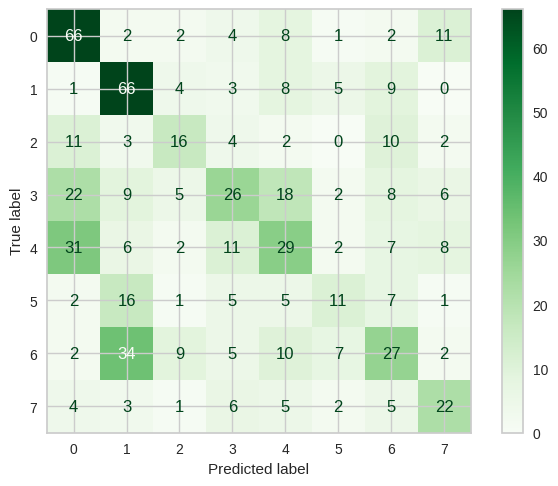

In [ ]:
print_confMatrix(y_test, y_pred)

****** ROC CURVE + AUC?: passo passo *******


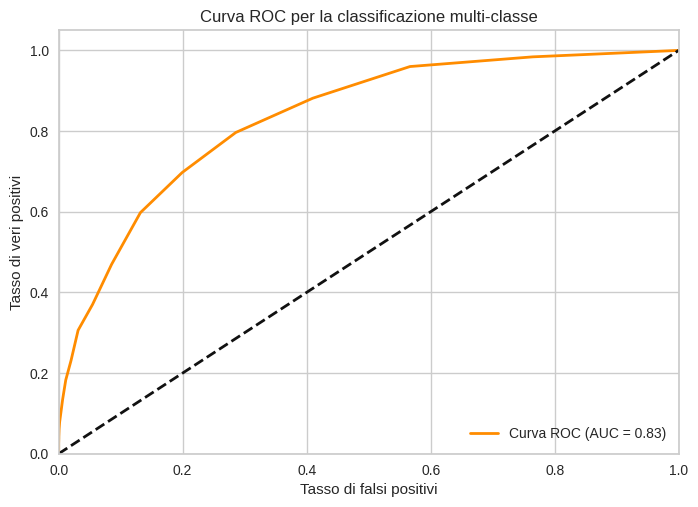

____________________________________
****** VALORE DI AUC *******
____________________________________
****** VALORE DI AUC *******
Micro-averaged One-vs-Rest ROC AUC score:
0.83
____________________________________
****** ROC CURVE: con metodo diretto *******


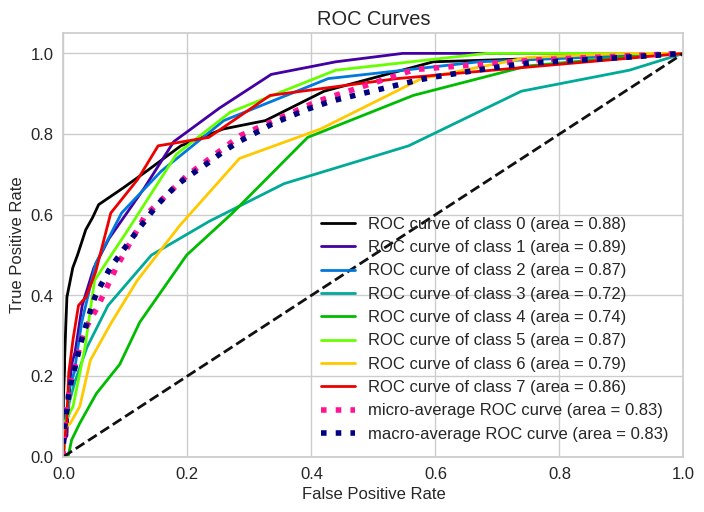

____________________________________
****** Precision recall: con metodo diretto *******


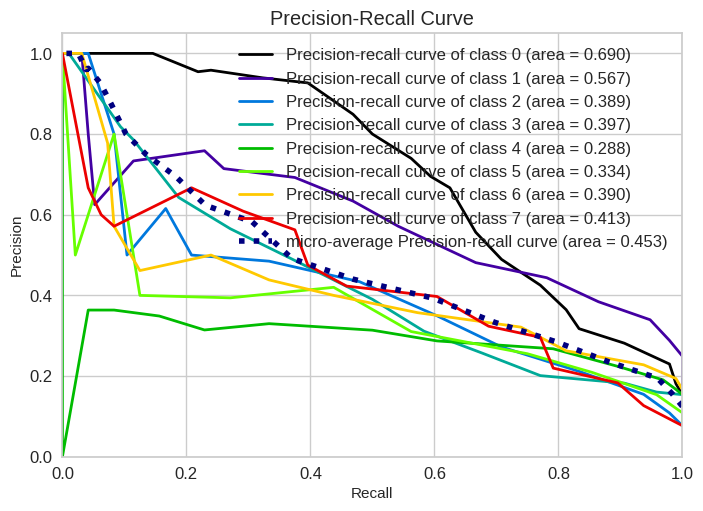

In [ ]:
y_score = clf.predict_proba(X_test)
plot_res(y_pred, y_score, y_test)

VALUTO L'OVERFITTING

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

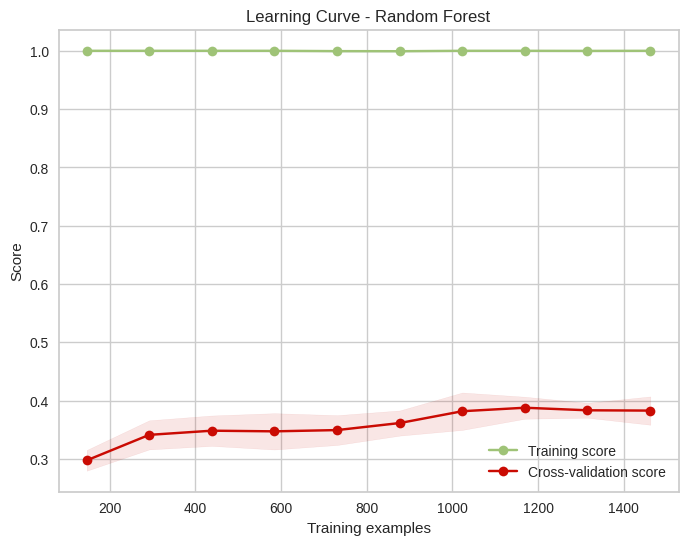

In [ ]:

from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(
    clf, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.title('Learning Curve - Random Forest')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.grid(True)
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color='b')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1,
                 color='r')
plt.plot(train_sizes, train_scores_mean, 'o-', color='g',
         label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='r',
         label='Cross-validation score')
plt.legend(loc='best')
plt.show()

##RANDOM FOREST + OVERSAMPLING

In [ ]:
from imblearn.over_sampling import RandomOverSampler

In [ ]:
ros=RandomOverSampler()
X_res, y_res= ros.fit_resample(X_train, y_train)
X_train.shape, y_train.shape

((1828, 162), (1828,))

In [ ]:
%%time
# Split the dataset in two equal parts
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=1000,  stratify = y_res)

# Set the parameters by cross-validation
tuned_parameters = {
    #'criterion' : ['gini', 'entropy'],

    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 5, 10, 20],
    'n_estimators': [25, 50, 100]
}

#scores = ['precision', 'recall', 'f1']
scores = ['accuracy']

for score in scores:
    print("# Tuning hyper-parameters for ----> %s" % score)
    print()

    obj = RandomForestClassifier()


    clf = GridSearchCV(obj, param_grid=tuned_parameters, cv=5, scoring=score)


    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()
 R


# Tuning hyper-parameters for ----> accuracy

Best parameters set found on development set:

{'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}

Grid scores on development set:

0.978 (+/-0.017) for {'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 25}
0.985 (+/-0.011) for {'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
0.982 (+/-0.010) for {'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
0.978 (+/-0.020) for {'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 25}
0.980 (+/-0.014) for {'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
0.983 (+/-0.016) for {'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
0.980 (+/-0.022) for {'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 25}
0.980 (+/-0.018) for {'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}
0.980 (+/-0.010) for {'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100

{'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 1000} iper parametri per target = emotion

In [ ]:
    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       324
           1       1.00      0.98      0.99       324

    accuracy                           0.99       648
   macro avg       0.99      0.99      0.99       648
weighted avg       0.99      0.99      0.99       648




In [ ]:
X_train_res, X_test_res, y_train_res, y_test_res = train_test_split(X_res, y_res, test_size=0.3, random_state=1000,  stratify = y_res)
clf2=RandomForestClassifier(min_samples_leaf= 1, min_samples_split= 2, n_estimators= 1000)
clf2.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000)

In [ ]:
y_true, y_pred = y_test_res, clf2.predict(X_test_res)
print(classification_report(y_true, y_pred))
print()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        84
           1       1.00      1.00      1.00        84
           2       1.00      1.00      1.00        84
           3       1.00      1.00      1.00        84
           4       1.00      1.00      1.00        84
           5       1.00      1.00      1.00        84
           6       1.00      1.00      1.00        84
           7       1.00      1.00      1.00        84

    accuracy                           1.00       672
   macro avg       1.00      1.00      1.00       672
weighted avg       1.00      1.00      1.00       672




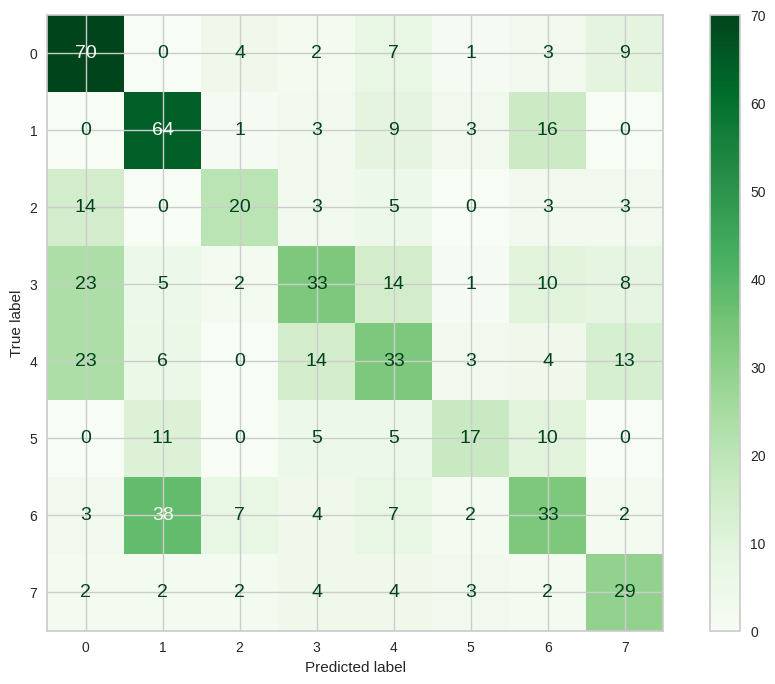

In [ ]:
print_confMatrix(y_test, y_pred)

****** ROC CURVE + AUC?: passo passo *******


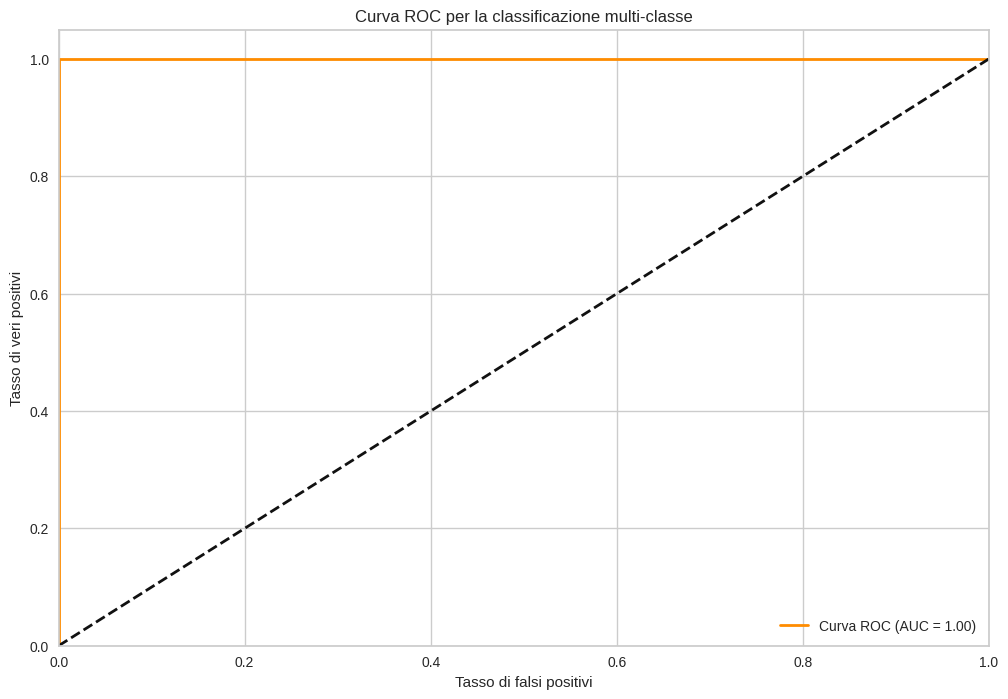

____________________________________
****** VALORE DI AUC *******
____________________________________
****** VALORE DI AUC *******
Micro-averaged One-vs-Rest ROC AUC score:
1.00
____________________________________
****** ROC CURVE: con metodo diretto *******


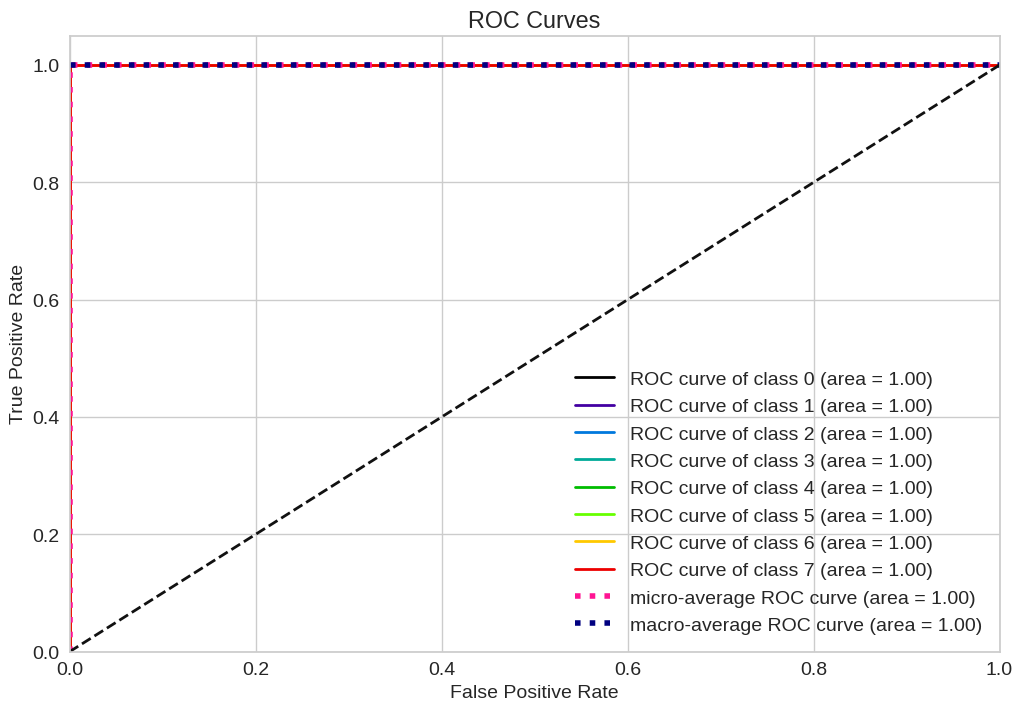

____________________________________
****** Precision recall: con metodo diretto *******


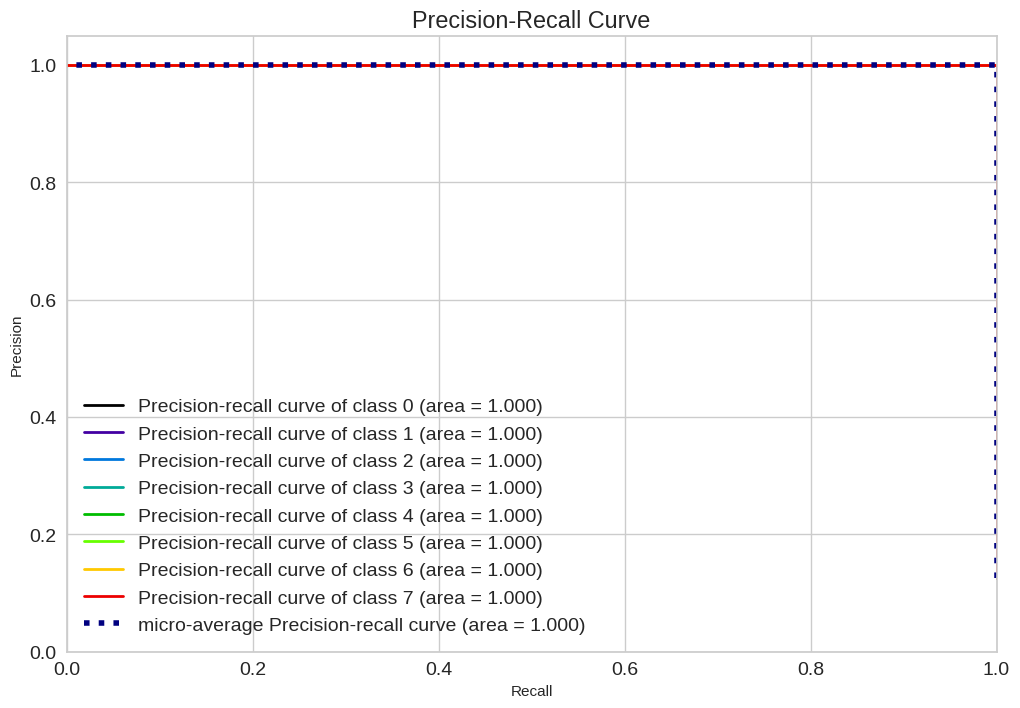

In [ ]:
y_score = clf2.predict_proba(X_test_res)
plot_res(y_pred, y_score, y_test_res)

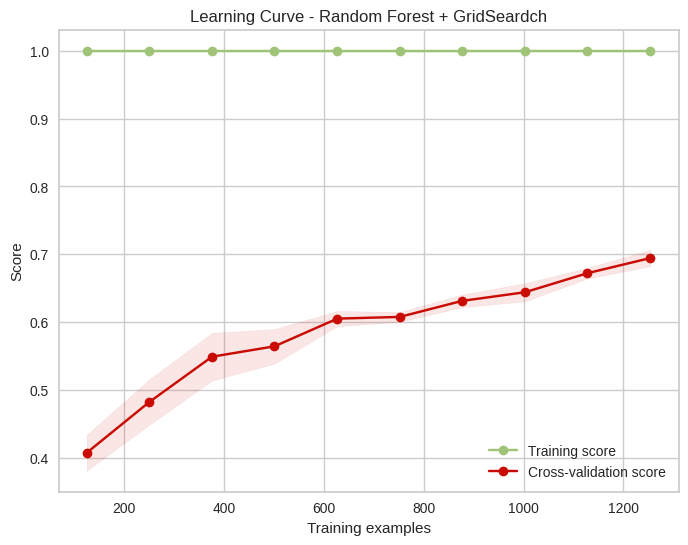

In [ ]:
from sklearn.model_selection import learning_curve
# Calcola la learning curve
train_sizes, train_scores, test_scores = learning_curve(
    clf2, X_train_res, y_train_res, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

# Calcola le medie e gli errori standard delle prestazioni
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plotta la learning curve
plt.figure(figsize=(8, 6))
plt.title('Learning Curve - Random Forest + Oversampling')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.grid(True)
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color='b')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1,
                 color='r')
plt.plot(train_sizes, train_scores_mean, 'o-', color='g',
         label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='r',
         label='Cross-validation score')
plt.legend(loc='best')
plt.show()

##RANDOM FOREST + UNDERSAMPLING

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
rus=RandomUnderSampler()
X_res, y_res=rus.fit_resample(X_train, y_train)



In [ ]:
%%time
# Split the dataset in two equal parts
X_train_res1, X_test_res1, y_train_res1, y_test_res1 = train_test_split(X_res, y_res, test_size=0.3, random_state=1000,  stratify = y_res)

# Set the parameters by cross-validation
tuned_parameters = {
    #'criterion' : ['gini', 'entropy'],

    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 5, 10, 20],
    'n_estimators': [25, 50, 100,  200, 500, 1000]
}


#scores = ['precision', 'recall', 'f1']
scores = ['accuracy']

for score in scores:
    print("# Tuning hyper-parameters for ----> %s" % score)
    print()

    obj = RandomForestClassifier()


    clf3 = RandomizedSearchCV(obj, tuned_parameters, cv=5, scoring=score)


    clf3.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf3.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf3.cv_results_['mean_test_score']
    stds = clf3.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf3.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()


# Tuning hyper-parameters for ----> accuracy

Best parameters set found on development set:

{'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1}

Grid scores on development set:

0.571 (+/-0.033) for {'n_estimators': 25, 'min_samples_split': 5, 'min_samples_leaf': 10}
0.627 (+/-0.041) for {'n_estimators': 500, 'min_samples_split': 20, 'min_samples_leaf': 5}
0.603 (+/-0.043) for {'n_estimators': 100, 'min_samples_split': 20, 'min_samples_leaf': 10}
0.679 (+/-0.055) for {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1}
0.626 (+/-0.050) for {'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 5}
0.563 (+/-0.037) for {'n_estimators': 25, 'min_samples_split': 20, 'min_samples_leaf': 10}
0.635 (+/-0.058) for {'n_estimators': 100, 'min_samples_split': 20, 'min_samples_leaf': 1}
0.584 (+/-0.027) for {'n_estimators': 25, 'min_samples_split': 2, 'min_samples_leaf': 10}
0.621 (+/-0.018) for {'n_estimators': 25, 'min_samples_split': 20, 'min_samples_

{'n_estimators': 500, 'min_samples_split': 5, 'min_samples_leaf': 1} target variable : emotion

In [ ]:

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf3.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       227
           1       0.98      0.97      0.98       227

    accuracy                           0.98       454
   macro avg       0.98      0.98      0.98       454
weighted avg       0.98      0.98      0.98       454




In [ ]:
clf3 = RandomForestClassifier(n_estimators = 500,min_samples_split =5, min_samples_leaf= 1)
clf3.fit(X_train, y_train)
y_pred = clf3.predict(X_test)
print(classification_report(y_true, y_pred))
print()

In [ ]:
y_score = clf3.predict_proba(X_test)
plot_res(y_pred, y_score, y_test)



In [ ]:
from sklearn.model_selection import learning_curve
# Calcola la learning curve
train_sizes, train_scores, test_scores = learning_curve(
    clf3, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

# Calcola le medie e gli errori standard delle prestazioni
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plotta la learning curve
plt.figure(figsize=(8, 6))
plt.title('Learning Curve - Random Forest + GridSeardch')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.grid(True)
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color='b')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1,
                 color='r')
plt.plot(train_sizes, train_scores_mean, 'o-', color='b',
         label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g',
         label='Cross-validation score')
plt.legend(loc='best')
plt.show()

##BAGGING

In [ ]:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

##BAGGING + DT

In [ ]:
%%time
from sklearn.naive_bayes import GaussianNB
# Set the parameters by cross-validation
param_grid = {
    'max_features' : [1, 2, 3, 4],
    'max_samples' : [0.05, 0.02, 0.01, 0.1, 0.2, 0.5, 1.0],
    'n_estimators': [1, 5, 10, 25, 50, 100]
}

#scores = ['precision', 'recall', 'f1']
scores = ['accuracy']

for score in scores:
    print("# Tuning hyper-parameters for ----> %s" % score)
    print()

    clf4 = RandomizedSearchCV(BaggingClassifier(DecisionTreeClassifier()), param_grid, scoring = score)
    clf4.fit(X_train, y_train)
    print("Best parameters set found on development set:")
    print()
    print(clf4.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf4.cv_results_['mean_test_score']
    stds = clf4.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf4.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf4.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()

# Tuning hyper-parameters for ----> accuracy

Best parameters set found on development set:

{'n_estimators': 100, 'max_samples': 0.1, 'max_features': 4}

Grid scores on development set:

0.248 (+/-0.040) for {'n_estimators': 5, 'max_samples': 0.2, 'max_features': 2}
0.483 (+/-0.050) for {'n_estimators': 100, 'max_samples': 0.1, 'max_features': 4}
0.172 (+/-0.059) for {'n_estimators': 10, 'max_samples': 0.05, 'max_features': 1}
0.253 (+/-0.048) for {'n_estimators': 100, 'max_samples': 0.02, 'max_features': 1}
0.299 (+/-0.061) for {'n_estimators': 25, 'max_samples': 0.1, 'max_features': 2}
0.145 (+/-0.040) for {'n_estimators': 1, 'max_samples': 0.02, 'max_features': 4}
0.221 (+/-0.059) for {'n_estimators': 5, 'max_samples': 0.1, 'max_features': 2}
0.462 (+/-0.040) for {'n_estimators': 100, 'max_samples': 0.5, 'max_features': 2}
0.170 (+/-0.051) for {'n_estimators': 1, 'max_samples': 0.1, 'max_features': 3}
0.261 (+/-0.049) for {'n_estimators': 1, 'max_samples': 0.5, 'max_features': 2}



:{'n_estimators': 100, 'max_samples': 0.02, 'max_features': 2}

target emotion

bagging + decision tree

In [ ]:
clf5 = BaggingClassifier(DecisionTreeClassifier(min_samples_split =5, min_samples_leaf= 1))
clf5.fit(X_train, y_train)
y_pred = clf5.predict(X_test)
print(classification_report(y_true, y_pred))
print()

              precision    recall  f1-score   support

           0       0.71      0.64      0.67        84
           1       0.52      0.52      0.52        84
           2       0.75      0.81      0.78        84
           3       0.72      0.50      0.59        84
           4       0.44      0.42      0.43        84
           5       0.59      0.81      0.68        84
           6       0.46      0.33      0.39        84
           7       0.69      0.88      0.77        84

    accuracy                           0.61       672
   macro avg       0.61      0.61      0.60       672
weighted avg       0.61      0.61      0.60       672




In [ ]:
#PLOT ROC CURVE

y_score = clf5.predict_proba(X_test)
plot_res(y_pred, y_score, y_test)



In [ ]:
#PLOT LEARNING CURVE

from sklearn.model_selection import learning_curve
# Calcola la learning curve
train_sizes, train_scores, test_scores = learning_curve(
    clf3, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

# Calcola le medie e gli errori standard delle prestazioni
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plotta la learning curve
plt.figure(figsize=(8, 6))
plt.title('Learning Curve - Bagging + DT')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.grid(True)
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color='b')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1,
                 color='r')
plt.plot(train_sizes, train_scores_mean, 'o-', color='b',
         label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='r',
         label='Cross-validation score')
plt.legend(loc='best')
plt.show()

##BAGGING + OVERSAMPLING

In [ ]:
from collections import Counter
ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({3: 68, 5: 68, 4: 68, 2: 68, 7: 68, 0: 68, 6: 68, 1: 68})


In [ ]:
%%time
# Split the dataset in two equal parts
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=1000, stratify = y_res)

# Set the parameters by cross-validation
param_grid = {
    'max_features' : [1, 2, 3, 4],
    'max_samples' : [0.05, 0.02, 0.01, 0.1, 0.2, 0.5, 1.0],
    'n_estimators': [1, 5, 10, 25, 50, 100]
}

#scores = ['precision', 'recall', 'f1']
scores = ['accuracy']

for score in scores:
    print("# Tuning hyper-parameters for ----> %s" % score)
    print()

    clf6 = RandomizedSearchCV(BaggingClassifier(DecisionTreeClassifier()), param_grid, scoring = score)
    clf6.fit(X_train, y_train)
    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf6.cv_results_['mean_test_score']
    stds = clf6.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf6.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf6.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()

# Tuning hyper-parameters for ----> accuracy

Best parameters set found on development set:

{'n_estimators': 25, 'max_samples': 0.1, 'max_features': 3}

Grid scores on development set:

0.153 (+/-0.049) for {'n_estimators': 10, 'max_samples': 0.01, 'max_features': 2}
0.168 (+/-0.139) for {'n_estimators': 1, 'max_samples': 0.5, 'max_features': 1}
0.216 (+/-0.081) for {'n_estimators': 1, 'max_samples': 1.0, 'max_features': 2}
0.145 (+/-0.055) for {'n_estimators': 50, 'max_samples': 0.01, 'max_features': 4}
0.171 (+/-0.090) for {'n_estimators': 1, 'max_samples': 0.1, 'max_features': 3}
0.174 (+/-0.130) for {'n_estimators': 50, 'max_samples': 0.02, 'max_features': 2}
0.153 (+/-0.052) for {'n_estimators': 10, 'max_samples': 0.02, 'max_features': 1}
0.195 (+/-0.069) for {'n_estimators': 5, 'max_samples': 1.0, 'max_features': 1}
0.218 (+/-0.039) for {'n_estimators': 25, 'max_samples': 0.1, 'max_features': 3}
0.174 (+/-0.031) for {'n_estimators': 1, 'max_samples': 0.1, 'max_features': 2}

Det

{'n_estimators': 50, 'max_samples': 0.2, 'max_features': 1} target emotion

In [ ]:
#PLOT ROC CURVE

y_score = clf6.predict_proba(X_test)
plot_res(y_pred, y_score, y_test)

#PLOT LEARNING CURVE

from sklearn.model_selection import learning_curve
# Calcola la learning curve
train_sizes, train_scores, test_scores = learning_curve(
    clf6, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

# Calcola le medie e gli errori standard delle prestazioni
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plotta la learning curve
plt.figure(figsize=(8, 6))
plt.title('Learning Curve - Bagging + DT')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.grid(True)
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color='b')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1,
                 color='r')
plt.plot(train_sizes, train_scores_mean, 'o-', color='b',
         label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='r',
         label='Cross-validation score')
plt.legend(loc='best')
plt.show()

##BAGGING + UNDERSAMPLING

In [ ]:
from collections import Counter
ros = RandomUnderSampler(random_state=42)
X_res, y_res = ros.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 95, 1: 95, 2: 95, 3: 95, 4: 95, 5: 95, 6: 95, 7: 95})


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=1000, stratify = y_res)

In [ ]:
%%time


# Set the parameters by cross-validation
param_grid = {
    'max_features' : [1, 2, 3, 4],
    'max_samples' : [0.05, 0.02, 0.01, 0.1, 0.2, 0.5, 1.0],
    'n_estimators' : [1,10,15,50,100]
}

#scores = ['precision', 'recall', 'f1']
scores = ['accuracy']

for score in scores:
    print("# Tuning hyper-parameters for ----> %s" % score)
    print()

    clf7 = RandomizedSearchCV(BaggingClassifier(DecisionTreeClassifier()), param_grid, scoring = score)
    clf7.fit(X_train, y_train)
    print("Best parameters set found on development set:")
    print()
    print(clf7.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf7.cv_results_['mean_test_score']
    stds = clf7.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf7.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf7.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()

# Tuning hyper-parameters for ----> accuracy

Best parameters set found on development set:

{'n_estimators': 50, 'max_samples': 0.2, 'max_features': 1}

Grid scores on development set:

0.246 (+/-0.059) for {'n_estimators': 10, 'max_samples': 0.5, 'max_features': 1}
0.209 (+/-0.061) for {'n_estimators': 10, 'max_samples': 0.05, 'max_features': 3}
0.184 (+/-0.058) for {'n_estimators': 1, 'max_samples': 0.2, 'max_features': 2}
0.236 (+/-0.099) for {'n_estimators': 10, 'max_samples': 0.05, 'max_features': 4}
0.229 (+/-0.055) for {'n_estimators': 1, 'max_samples': 0.5, 'max_features': 4}
0.283 (+/-0.049) for {'n_estimators': 15, 'max_samples': 0.2, 'max_features': 2}
0.296 (+/-0.046) for {'n_estimators': 50, 'max_samples': 0.2, 'max_features': 1}
0.171 (+/-0.036) for {'n_estimators': 1, 'max_samples': 0.2, 'max_features': 1}
0.224 (+/-0.063) for {'n_estimators': 10, 'max_samples': 0.2, 'max_features': 1}
0.280 (+/-0.035) for {'n_estimators': 100, 'max_samples': 0.02, 'max_features': 2}

D

{'n_estimators': 50, 'max_samples': 0.5, 'max_features': 2}

LEARNING CURVE

In [ ]:

y_score = clf7.predict_proba(X_test)
plot_res(y_pred, y_score, y_test)

from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(
    clf7, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.title('Learning Curve - Bagging + DT')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.grid(True)
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color='b')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1,
                 color='r')
plt.plot(train_sizes, train_scores_mean, 'o-', color='b',
         label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='r',
         label='Cross-validation score')
plt.legend(loc='best')
plt.show()

##ADABOOST

In [ ]:
import pandas as pd
import numpy as np
import warnings
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
%%time
from sklearn.tree import DecisionTreeClassifier
# Set the parameters by cross-validation
tuned_parameters = {
    'n_estimators': [5, 10, 25, 50, 100],
    'learning_rate' : [0.1, 0.25, 0.5, 0.75, 1],
    'n_estimators': [1,10,15,50,100]
 }

#scores = ['precision', 'recall', 'f1']
scores = ['accuracy']

for score in scores:
    print("# Tuning hyper-parameters for ----> %s" % score)
    print()

    obj = AdaBoostClassifier(DecisionTreeClassifier())

    clf8 = RandomizedSearchCV(obj, tuned_parameters, cv=5, scoring=score)

    clf8.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf8.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf8.cv_results_['mean_test_score']
    stds = clf8.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf8.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf8.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()

# Tuning hyper-parameters for ----> accuracy

Best parameters set found on development set:

{'n_estimators': 50, 'learning_rate': 0.75}

Grid scores on development set:

0.518 (+/-0.034) for {'n_estimators': 10, 'learning_rate': 1}
0.518 (+/-0.042) for {'n_estimators': 100, 'learning_rate': 0.5}
0.524 (+/-0.064) for {'n_estimators': 10, 'learning_rate': 0.1}
0.524 (+/-0.048) for {'n_estimators': 1, 'learning_rate': 0.1}
0.517 (+/-0.048) for {'n_estimators': 50, 'learning_rate': 0.5}
0.526 (+/-0.052) for {'n_estimators': 100, 'learning_rate': 0.1}
0.529 (+/-0.059) for {'n_estimators': 50, 'learning_rate': 0.75}
0.527 (+/-0.027) for {'n_estimators': 1, 'learning_rate': 0.75}
0.526 (+/-0.039) for {'n_estimators': 1, 'learning_rate': 0.25}
0.526 (+/-0.072) for {'n_estimators': 15, 'learning_rate': 0.75}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

              precision    recall  f1-score   suppo

{'n_estimators': 15, 'learning_rate': 0.1}

In [ ]:
clf8 = AdaBoostClassifier(learning_rate= 0.5, n_estimators= 5)
clf8.fit(X_train, y_train)
y_pred = clf8.predict(X_test)
y_score = clf8.predict_proba(X_test)


In [ ]:
#PLOT ROC CURVE

y_score = clf8.predict_proba(X_test)
plot_res(y_pred, y_score, y_test)

#PLOT LEARNING CURVE

from sklearn.model_selection import learning_curve
# Calcola la learning curve
train_sizes, train_scores, test_scores = learning_curve(
    clf8, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

# Calcola le medie e gli errori standard delle prestazioni
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plotta la learning curve
plt.figure(figsize=(8, 6))
plt.title('Learning Curve - Bagging + DT')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.grid(True)
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color='b')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1,
                 color='r')
plt.plot(train_sizes, train_scores_mean, 'o-', color='b',
         label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='r',
         label='Cross-validation score')
plt.legend(loc='best')
plt.show()

##ADABOOST + OVERSAMPLING

In [ ]:
import warnings
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.ensemble import AdaBoostClassifier
from imblearn.pipeline import Pipeline, make_pipeline
from imblearn.over_sampling import RandomOverSampler

In [ ]:
ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X_train, y_train)
#print('Resampled dataset shape %s' % Counter(y_res))

# Split the dataset in two equal parts
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=1000, stratify = y_res)

# Set the parameters by cross-validation
tuned_parameters = {
    'n_estimators': [1, 5, 10, 25, 50, 100],
    'learning_rate' : [0.1, 0.25, 0.5, 0.75, 1],
    'n_estimators': [1,10,15,50,100]
 }

#scores = ['precision', 'recall', 'f1']
scores = ['accuracy']

for score in scores:
    print("# Tuning hyper-parameters for ----> %s" % score)
    print()

    obj = AdaBoostClassifier(GaussianNB())

    clf9 = RandomizedSearchCV(obj, tuned_parameters, cv=5, scoring=score)

    clf9.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf9.cv_results_['mean_test_score']
    stds = clf9.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf9.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf9.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()

# Tuning hyper-parameters for ----> accuracy

Best parameters set found on development set:

{'n_estimators': 100, 'learning_rate': 0.1}

Grid scores on development set:

0.380 (+/-0.099) for {'n_estimators': 100, 'learning_rate': 0.1}
0.328 (+/-0.114) for {'n_estimators': 10, 'learning_rate': 0.5}
0.362 (+/-0.102) for {'n_estimators': 1, 'learning_rate': 1}
0.306 (+/-0.096) for {'n_estimators': 50, 'learning_rate': 0.75}
0.279 (+/-0.148) for {'n_estimators': 15, 'learning_rate': 0.75}
0.340 (+/-0.101) for {'n_estimators': 50, 'learning_rate': 0.5}
0.362 (+/-0.102) for {'n_estimators': 1, 'learning_rate': 0.25}
0.369 (+/-0.074) for {'n_estimators': 10, 'learning_rate': 0.1}
0.377 (+/-0.053) for {'n_estimators': 50, 'learning_rate': 0.1}
0.291 (+/-0.123) for {'n_estimators': 10, 'learning_rate': 0.75}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

              precision    recall  f1-score   suppo

In [ ]:
#PLOT ROC CURVE

y_score = clf9.predict_proba(X_test)
plot_res(y_pred, y_score, y_test)

#PLOT LEARNING CURVE

from sklearn.model_selection import learning_curve
# Calcola la learning curve
train_sizes, train_scores, test_scores = learning_curve(
    clf9, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

# Calcola le medie e gli errori standard delle prestazioni
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plotta la learning curve
plt.figure(figsize=(8, 6))
plt.title('Learning Curve - Bagging + DT')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.grid(True)
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color='b')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1,
                 color='r')
plt.plot(train_sizes, train_scores_mean, 'o-', color='b',
         label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='r',
         label='Cross-validation score')
plt.legend(loc='best')
plt.show()

In [ ]:
#ros = RandomOverSampler(random_state=42)
#X_res, y_res = ros.fit_resample(X_train, y_train)
#print('Resampled dataset shape %s' % Counter(y_res))

# Split the dataset in two equal parts
#X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=1000, stratify = y_res)
#clf = AdaBoostClassifier(learning_rate= 0.1, n_estimators= 5)
#clf.fit(X_train, y_train)
#y_pred = clf.predict(X_test)
#y_score = clf.predict_proba(X_test)
#plot_res(y_pred, y_score, y_test)

##ADABOOST + UNDERSAMPLING

In [ ]:
from imblearn.under_sampling import RandomUnderSampler


In [ ]:
ros = RandomUnderSampler(random_state=42)
X_res, y_res = ros.fit_resample(X_train, y_train)
#print('Resampled dataset shape %s' % Counter(y_res))

# Split the dataset in two equal parts
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=1000, stratify = y_res)

# Set the parameters by cross-validation
params = {
    'n_estimators': [1, 5, 10, 25, 50, 100],
    'learning_rate' : [0.1, 0.25, 0.5, 0.75, 1],
 }

#scores = ['precision', 'recall', 'f1']
scores = ['accuracy']

for score in scores:
    print("# Tuning hyper-parameters for ----> %s" % score)
    print()

    obj = AdaBoostClassifier(DecisionTreeClassifier())

    clf10 = RandomizedSearchCV(obj, params, cv=5, scoring=score)

    clf10.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf10.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf10.cv_results_['mean_test_score']
    stds = clf10.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf10.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf10.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()

# Tuning hyper-parameters for ----> accuracy

Best parameters set found on development set:

{'n_estimators': 10, 'learning_rate': 1}

Grid scores on development set:

0.239 (+/-0.159) for {'n_estimators': 50, 'learning_rate': 0.5}
0.234 (+/-0.116) for {'n_estimators': 100, 'learning_rate': 0.75}
0.245 (+/-0.092) for {'n_estimators': 25, 'learning_rate': 0.5}
0.212 (+/-0.071) for {'n_estimators': 10, 'learning_rate': 0.75}
0.234 (+/-0.152) for {'n_estimators': 1, 'learning_rate': 0.1}
0.245 (+/-0.161) for {'n_estimators': 5, 'learning_rate': 0.25}
0.245 (+/-0.126) for {'n_estimators': 100, 'learning_rate': 1}
0.250 (+/-0.176) for {'n_estimators': 10, 'learning_rate': 0.1}
0.234 (+/-0.131) for {'n_estimators': 50, 'learning_rate': 0.1}
0.261 (+/-0.131) for {'n_estimators': 10, 'learning_rate': 1}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

              precision    recall  f1-score   support

 

In [ ]:
#ros = RandomUnderSampler(random_state=42)
#X_res, y_res = ros.fit_resample(X_train, y_train)
#print('Resampled dataset shape %s' % Counter(y_res))

# Split the dataset in two equal parts
#X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=1000, stratify = y_res)
#clf = AdaBoostClassifier(learning_rate= 0.1, n_estimators= 5)
#clf.fit(X_train, y_train)
#y_pred = clf.predict(X_test)


Resampled dataset shape Counter({0: 23, 1: 23, 2: 23, 3: 23, 4: 23, 5: 23, 6: 23, 7: 23})


****** ROC CURVE + AUC?: passo passo *******


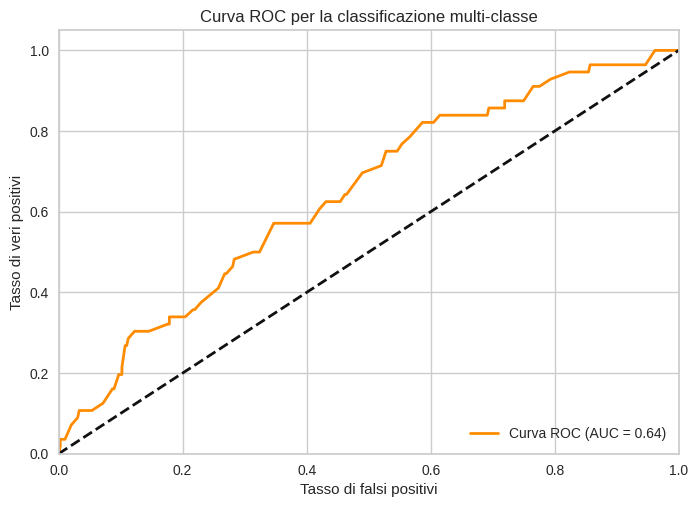

____________________________________
****** VALORE DI AUC *******
____________________________________
****** VALORE DI AUC *******
Micro-averaged One-vs-Rest ROC AUC score:
0.64
____________________________________
****** ROC CURVE: con metodo diretto *******


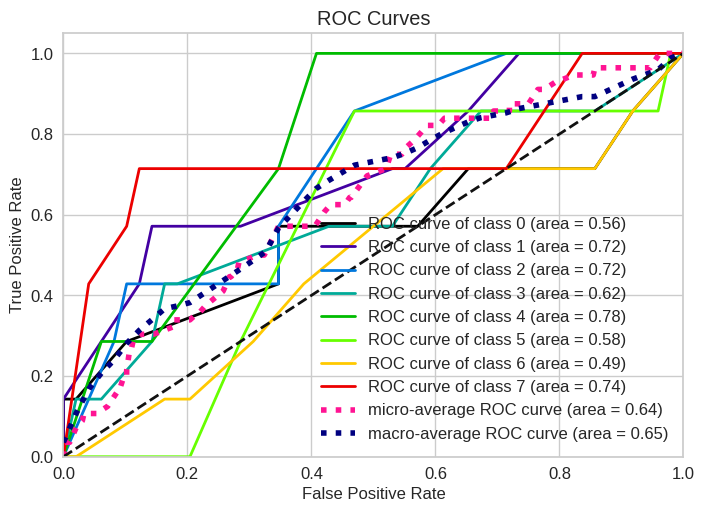

____________________________________
****** Precision recall: con metodo diretto *******


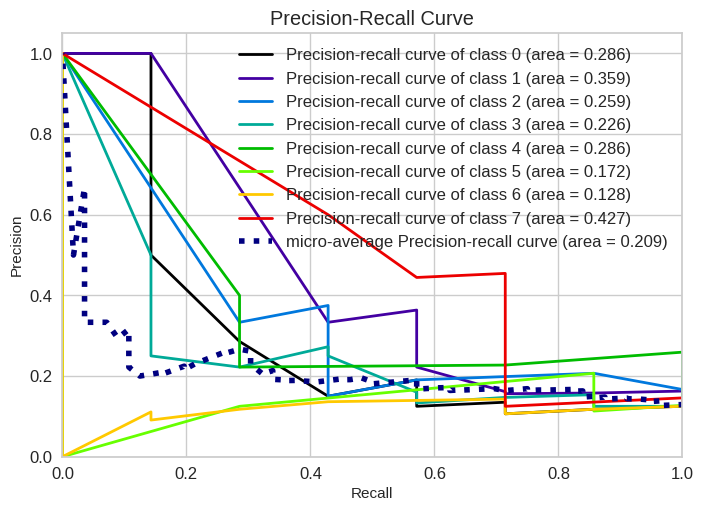

In [ ]:
y_score = clf10.predict_proba(X_test)
plot_res(y_pred, y_score, y_test)

In [ ]:
#PLOT LEARNING CURVE

from sklearn.model_selection import learning_curve
# Calcola la learning curve
train_sizes, train_scores, test_scores = learning_curve(
    clf10, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

# Calcola le medie e gli errori standard delle prestazioni
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plotta la learning curve
plt.figure(figsize=(8, 6))
plt.title('Learning Curve - Bagging + DT')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.grid(True)
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color='b')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1,
                 color='r')
plt.plot(train_sizes, train_scores_mean, 'o-', color='b',
         label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='r',
         label='Cross-validation score')
plt.legend(loc='best')
plt.show()

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
clf = AdaBoostClassifier(base_estimator=None, n_estimators=100, random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

In [ ]:
clf = AdaBoostClassifier(base_estimator=RandomForestClassifier(n_estimators=100), n_estimators=100, random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))